In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sys

In [2]:
#Просмотр входных данных на правильность
dataMovements = pd.read_csv("MurAutomatMovements2.csv", sep=',', header=1, index_col=0, encoding='cp1251', skipinitialspace=True, dtype=int)
dataOutputDictionary = dict()
with open('MurAutomatMovements2.csv', 'r') as f:
    outputs = f.readline().replace(" ", "").replace("\n", "").split(",")
    ways = f.readline().replace(" ", "").replace("\n", "").split(",")
    for i in range(0, len(ways)):
        dataOutputDictionary[ways[i]] = outputs[i]
        
print("Данные движений автомата Мура")
print(dataMovements)
print("Данные выходов автомата Мура")
print(dataOutputDictionary)

Данные движений автомата Мура
   1  2  3  4  5
1  2  5  5  3  3
2  4  2  2  1  1
Данные выходов автомата Мура
{'1': '1', '2': '1', '3': '3', '4': '2', '5': '3'}


In [3]:
dataOutputs = dataMovements.copy()
for i, j in dataMovements.iteritems():
    for k, l in j.items():
        dataOutputs.loc[k][i] = int(dataOutputDictionary[str(l)])
        
print("Данные движений автомата Мили")
print(dataMovements)
print()
print("Данные выходов автомата Мили")
print(dataOutputs)
    

Данные движений автомата Мили
   1  2  3  4  5
1  2  5  5  3  3
2  4  2  2  1  1

Данные выходов автомата Мили
   1  2  3  4  5
1  1  3  3  3  3
2  2  1  1  1  1


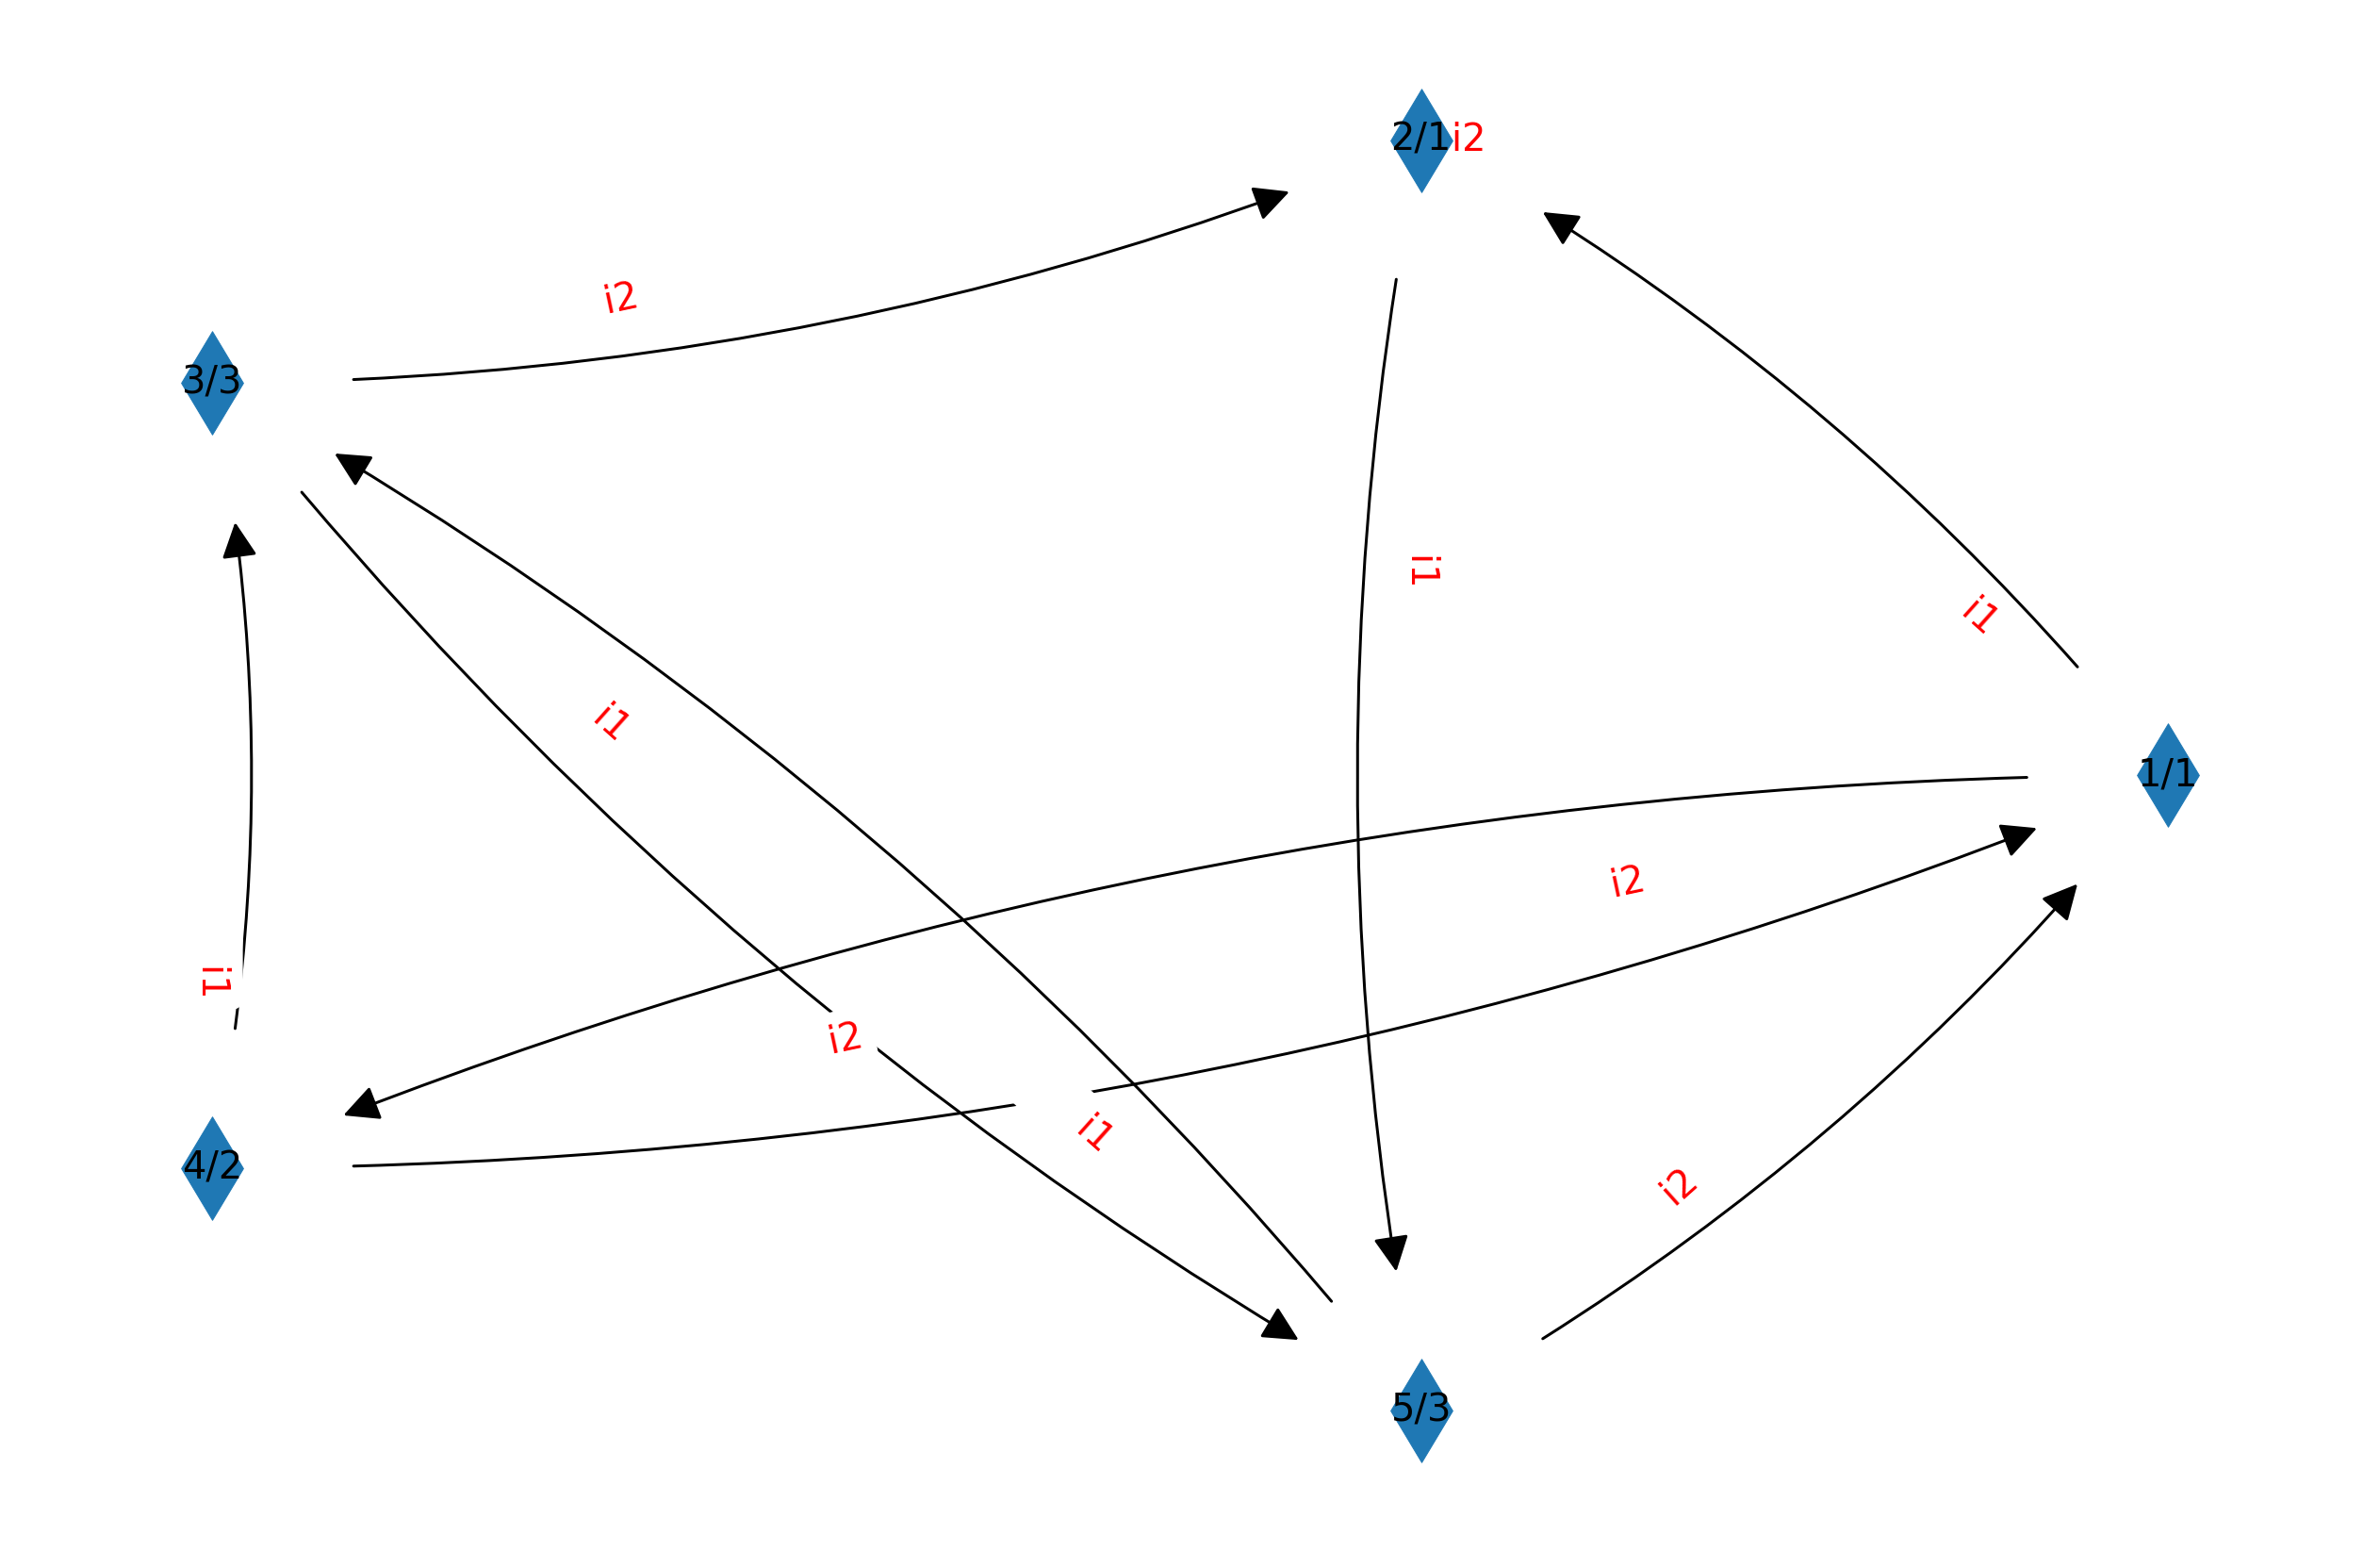

In [4]:
#Строим граф для Мура, до превращения в Мили
plt.figure(figsize=(45, 30))
G = nx.DiGraph()

for i, j in dataMovements.iteritems():
    name = str(i) + "/" + dataOutputDictionary[str(i)]
    G.add_node(name)

pos = nx.circular_layout(G)
    
for i, j in dataMovements.iteritems():
    for k, l in j.items():
        G.add_edge(str(i) + "/" + dataOutputDictionary[str(i)], str(l) + "/" + dataOutputDictionary[str(l)])
        nx.draw_networkx_edge_labels(G, pos, label_pos=0.7, edge_labels = {(str(i) + "/" + dataOutputDictionary[str(i)], str(l) + "/" + dataOutputDictionary[str(l)]): "        i" + str(k)}, font_color='red', font_size=40, verticalalignment="center")
        
nx.draw_networkx_nodes(G, pos, node_size=6000, node_shape="d")
## edges
nx.draw_networkx_edges(G, pos, width=3, arrowsize=80, min_source_margin=150, min_target_margin=150, connectionstyle="arc3, rad=0.1")

nx.draw_networkx_labels(G, pos, font_size=40, font_family='sans-serif')
plt.axis('off')

plt.show()

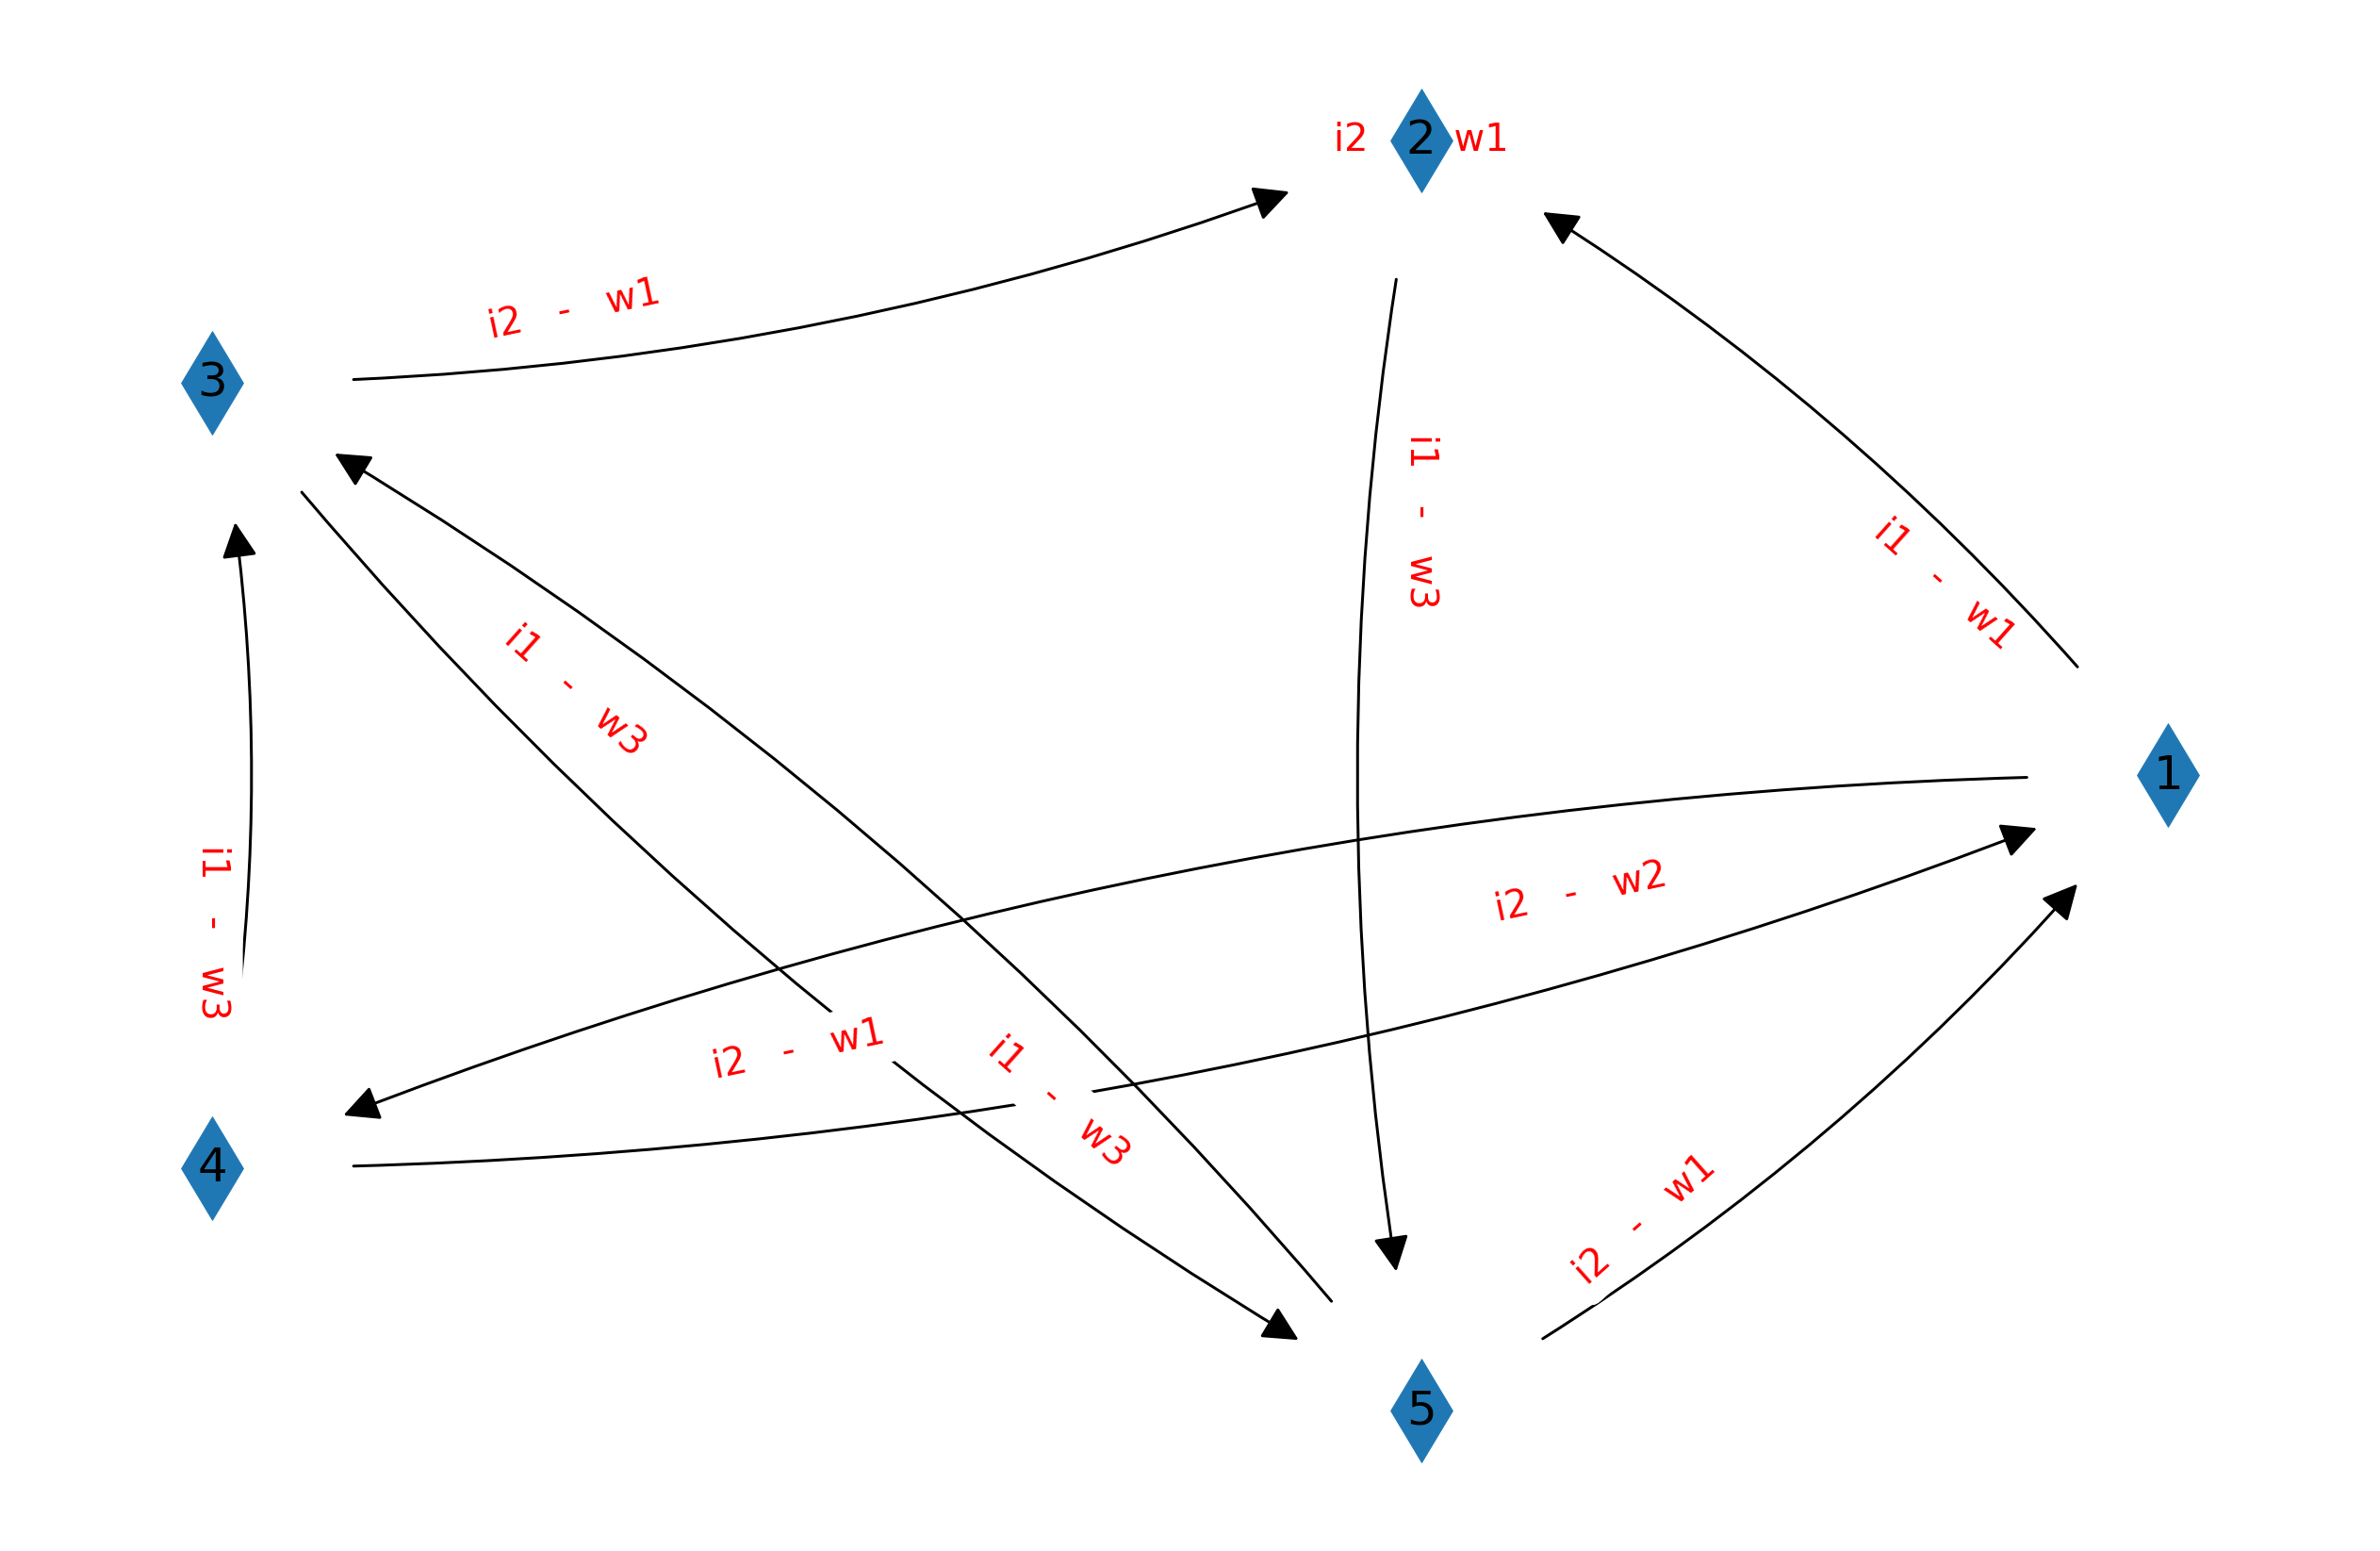

In [5]:
#Строим граф для Мили
plt.figure(figsize=(45, 30))
G = nx.DiGraph()

for i, j in dataMovements.iteritems():
    G.add_node(i)
    
for i, j in dataMovements.iteritems():
    for k, l in j.items():
        G.add_edge(i, str(l))
        
pos = nx.circular_layout(G)
        
for i, j in dataMovements.iteritems():
    for k, l in j.items():
        nx.draw_networkx_edge_labels(G, pos, label_pos=0.7, edge_labels = {(i, str(l)): "i" + str(k) + "   -   w" + str(dataOutputs[i][k])}, font_color='red', font_size=40, verticalalignment="center")


nx.draw_networkx_nodes(G, pos, node_size=6000, node_shape="d")
## edges
nx.draw_networkx_edges(G, pos, width=3, arrowsize=80, min_source_margin=150, min_target_margin=150, connectionstyle="arc3, rad=0.1")

nx.draw_networkx_labels(G, pos, font_size=50, font_family='sans-serif')
plt.axis('off')

plt.show()